## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.647815  0.179358 -1.741362 -0.839384 -0.246729  0.090416
1  1.333997 -1.415063  1.250181 -1.402272 -0.436542 -1.072533
2  0.399777 -1.328181  0.078318  0.215731 -0.154245 -0.743025
3 -1.496855 -1.328473  0.463390  1.718029 -0.593928 -0.433958
4 -0.532409 -0.367719 -0.195277 -0.651542  1.224431 -0.563019


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9033590	total: 69.7ms	remaining: 1m 9s
1:	learn: 0.8932139	total: 70.2ms	remaining: 35s
2:	learn: 0.8834424	total: 70.8ms	remaining: 23.5s
3:	learn: 0.8745604	total: 71.3ms	remaining: 17.8s
4:	learn: 0.8655866	total: 71.8ms	remaining: 14.3s
5:	learn: 0.8563399	total: 72.3ms	remaining: 12s
6:	learn: 0.8470051	total: 72.8ms	remaining: 10.3s
7:	learn: 0.8373438	total: 73.2ms	remaining: 9.08s
8:	learn: 0.8296142	total: 73.8ms	remaining: 8.13s
9:	learn: 0.8225242	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8150644	total: 75ms	remaining: 6.75s
11:	learn: 0.8069171	total: 75.7ms	remaining: 6.23s
12:	learn: 0.7980526	total: 76.3ms	remaining: 5.79s
13:	learn: 0.7911464	total: 76.9ms	remaining: 5.41s
14:	learn: 0.7832887	total: 77.4ms	remaining: 5.08s
15:	learn: 0.7752245	total: 77.8ms	remaining: 4.79s
16:	learn: 0.7688452	total: 78.3ms	remaining: 4.53s
17:	learn: 0.7614629	total: 78.8ms	remaining: 4.3s
18:	learn: 0.7550188	total: 79.3ms	remaining: 4.1s


85:	learn: 0.4194485	total: 109ms	remaining: 1.16s
86:	learn: 0.4160703	total: 110ms	remaining: 1.15s
87:	learn: 0.4131009	total: 110ms	remaining: 1.14s
88:	learn: 0.4091117	total: 110ms	remaining: 1.13s
89:	learn: 0.4064586	total: 111ms	remaining: 1.12s
90:	learn: 0.4037354	total: 111ms	remaining: 1.11s
91:	learn: 0.4004562	total: 111ms	remaining: 1.1s
92:	learn: 0.3978950	total: 112ms	remaining: 1.09s
93:	learn: 0.3952637	total: 112ms	remaining: 1.08s
94:	learn: 0.3921467	total: 113ms	remaining: 1.07s
95:	learn: 0.3887841	total: 113ms	remaining: 1.06s
96:	learn: 0.3852567	total: 113ms	remaining: 1.05s
97:	learn: 0.3825126	total: 114ms	remaining: 1.05s
98:	learn: 0.3791117	total: 114ms	remaining: 1.04s
99:	learn: 0.3764779	total: 115ms	remaining: 1.03s
100:	learn: 0.3734711	total: 115ms	remaining: 1.02s
101:	learn: 0.3708126	total: 116ms	remaining: 1.02s
102:	learn: 0.3681670	total: 116ms	remaining: 1.01s
103:	learn: 0.3652400	total: 116ms	remaining: 1s
104:	learn: 0.3625664	total: 11

265:	learn: 0.1300154	total: 187ms	remaining: 517ms
266:	learn: 0.1292564	total: 188ms	remaining: 516ms
267:	learn: 0.1285781	total: 188ms	remaining: 515ms
268:	learn: 0.1279047	total: 189ms	remaining: 513ms
269:	learn: 0.1273887	total: 189ms	remaining: 512ms
270:	learn: 0.1270568	total: 190ms	remaining: 510ms
271:	learn: 0.1264681	total: 190ms	remaining: 509ms
272:	learn: 0.1259253	total: 191ms	remaining: 508ms
273:	learn: 0.1253556	total: 191ms	remaining: 506ms
274:	learn: 0.1248754	total: 192ms	remaining: 505ms
275:	learn: 0.1245481	total: 192ms	remaining: 504ms
276:	learn: 0.1236147	total: 193ms	remaining: 503ms
277:	learn: 0.1228468	total: 193ms	remaining: 502ms
278:	learn: 0.1224856	total: 194ms	remaining: 501ms
279:	learn: 0.1219916	total: 194ms	remaining: 499ms
280:	learn: 0.1214755	total: 195ms	remaining: 498ms
281:	learn: 0.1209051	total: 195ms	remaining: 497ms
282:	learn: 0.1204797	total: 196ms	remaining: 496ms
283:	learn: 0.1195272	total: 196ms	remaining: 495ms
284:	learn: 

488:	learn: 0.0464617	total: 292ms	remaining: 305ms
489:	learn: 0.0462515	total: 292ms	remaining: 304ms
490:	learn: 0.0460313	total: 293ms	remaining: 304ms
491:	learn: 0.0458441	total: 293ms	remaining: 303ms
492:	learn: 0.0456105	total: 294ms	remaining: 302ms
493:	learn: 0.0453988	total: 294ms	remaining: 301ms
494:	learn: 0.0452166	total: 295ms	remaining: 301ms
495:	learn: 0.0449906	total: 295ms	remaining: 300ms
496:	learn: 0.0447922	total: 296ms	remaining: 299ms
497:	learn: 0.0445940	total: 296ms	remaining: 298ms
498:	learn: 0.0443924	total: 296ms	remaining: 298ms
499:	learn: 0.0441944	total: 297ms	remaining: 297ms
500:	learn: 0.0439779	total: 297ms	remaining: 296ms
501:	learn: 0.0437846	total: 298ms	remaining: 295ms
502:	learn: 0.0435172	total: 298ms	remaining: 294ms
503:	learn: 0.0433272	total: 299ms	remaining: 294ms
504:	learn: 0.0430890	total: 299ms	remaining: 293ms
505:	learn: 0.0428983	total: 299ms	remaining: 292ms
506:	learn: 0.0427168	total: 300ms	remaining: 292ms
507:	learn: 

657:	learn: 0.0227059	total: 371ms	remaining: 193ms
658:	learn: 0.0225604	total: 372ms	remaining: 192ms
659:	learn: 0.0224710	total: 372ms	remaining: 192ms
660:	learn: 0.0223832	total: 373ms	remaining: 191ms
661:	learn: 0.0223364	total: 373ms	remaining: 190ms
662:	learn: 0.0222682	total: 374ms	remaining: 190ms
663:	learn: 0.0221264	total: 375ms	remaining: 190ms
664:	learn: 0.0220311	total: 376ms	remaining: 189ms
665:	learn: 0.0219857	total: 376ms	remaining: 189ms
666:	learn: 0.0219478	total: 377ms	remaining: 188ms
667:	learn: 0.0218417	total: 377ms	remaining: 187ms
668:	learn: 0.0217794	total: 378ms	remaining: 187ms
669:	learn: 0.0217423	total: 378ms	remaining: 186ms
670:	learn: 0.0216979	total: 379ms	remaining: 186ms
671:	learn: 0.0216614	total: 379ms	remaining: 185ms
672:	learn: 0.0215249	total: 380ms	remaining: 184ms
673:	learn: 0.0214889	total: 380ms	remaining: 184ms
674:	learn: 0.0214352	total: 381ms	remaining: 183ms
675:	learn: 0.0213711	total: 381ms	remaining: 183ms
676:	learn: 

885:	learn: 0.0105710	total: 476ms	remaining: 61.2ms
886:	learn: 0.0105420	total: 476ms	remaining: 60.7ms
887:	learn: 0.0104881	total: 477ms	remaining: 60.1ms
888:	learn: 0.0104455	total: 478ms	remaining: 59.7ms
889:	learn: 0.0103818	total: 478ms	remaining: 59.1ms
890:	learn: 0.0103401	total: 479ms	remaining: 58.6ms
891:	learn: 0.0103010	total: 479ms	remaining: 58ms
892:	learn: 0.0102533	total: 480ms	remaining: 57.5ms
893:	learn: 0.0102256	total: 480ms	remaining: 56.9ms
894:	learn: 0.0101969	total: 481ms	remaining: 56.4ms
895:	learn: 0.0101608	total: 481ms	remaining: 55.8ms
896:	learn: 0.0101268	total: 481ms	remaining: 55.3ms
897:	learn: 0.0100915	total: 482ms	remaining: 54.7ms
898:	learn: 0.0100410	total: 482ms	remaining: 54.2ms
899:	learn: 0.0099853	total: 483ms	remaining: 53.6ms
900:	learn: 0.0099394	total: 483ms	remaining: 53.1ms
901:	learn: 0.0099049	total: 484ms	remaining: 52.5ms
902:	learn: 0.0098768	total: 484ms	remaining: 52ms
903:	learn: 0.0098444	total: 485ms	remaining: 51.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

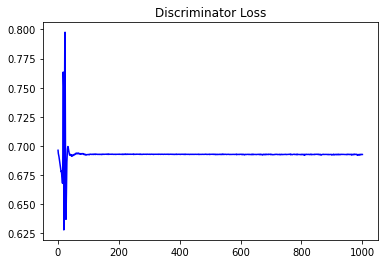

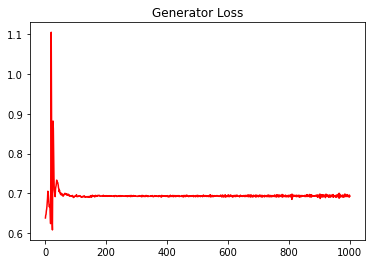

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12965329003031129


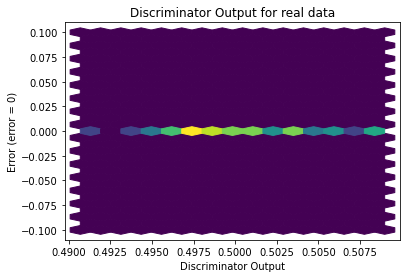

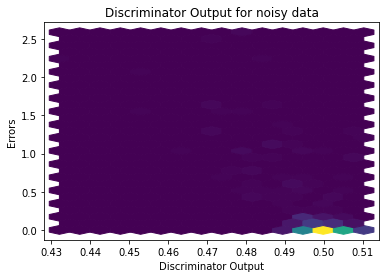

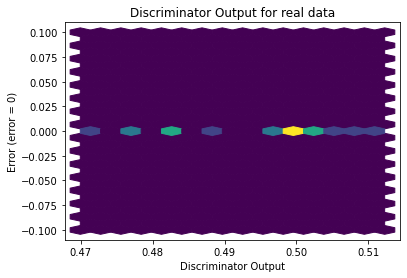

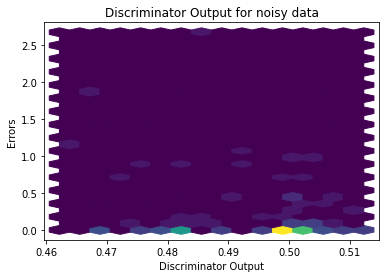

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


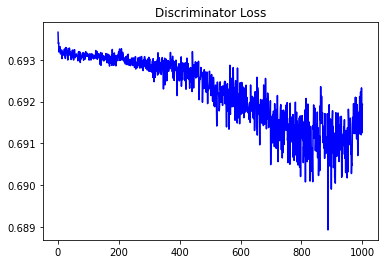

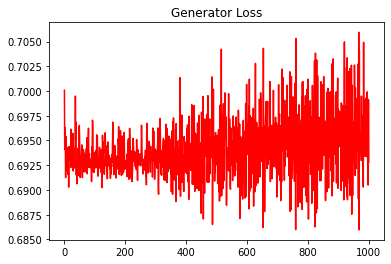

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1824840613601123


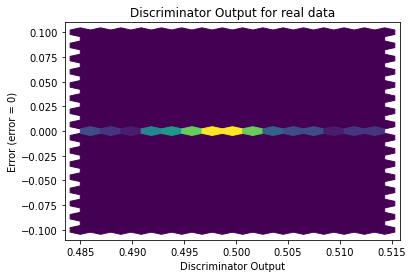

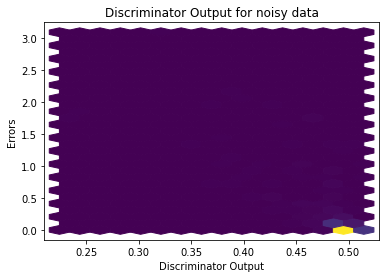

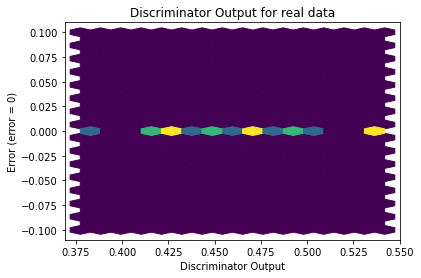

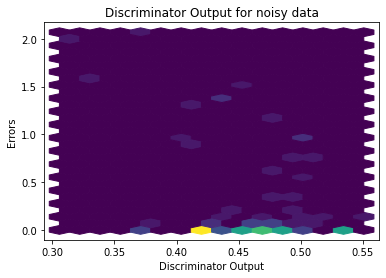

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1788]], requires_grad=True)
